## **IMPORTAÇÃO DE BIBLIOTECAS E DADOS** 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [7]:
X = df_train.drop(columns=['labels'])
y = df_train['labels']

---
## **EXPLORAÇÃO INICIAL DOS DADOS E HIPÓTESES** 

In [8]:
df_train.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX                     646 non-null    int64  
 13  is_otherstate             646 non-null    int64  
 14  category_c

In [10]:
df_train.describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
count,646.000000,611.000000,637.000000,508.000000,535.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,461.577399,2.341718,4.037724,3.352657,4.944729,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.003096,0.304954,0.329721,0.260062,0.515480,0.419505,0.235294,0.091331,2.848655,0.647059
std,264.859464,2.468275,2.950923,2.866952,3.213319,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.055598,0.460745,0.470476,0.439008,0.500148,0.493860,0.424511,0.288303,1.894050,0.478255
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,233.250000,0.680000,1.870000,1.185000,2.540000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,459.500000,1.650000,3.610000,2.785000,4.620000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,692.500000,3.600000,5.590000,4.935000,6.880000,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [11]:
df_train.isnull().sum()

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

In [12]:
df_train.isna().sum()

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

In [13]:
df_train['category_code'].unique()

array(['enterprise', 'advertising', 'photo_video', 'web', 'software',
       'games_video', 'mobile', 'sports', 'fashion', 'semiconductor',
       'security', 'biotech', 'hardware', 'public_relations', 'ecommerce',
       'other', 'social', 'cleantech', 'manufacturing', 'automotive',
       'network_hosting', 'messaging', 'music', 'travel', 'consulting',
       'search', 'finance', 'medical', 'analytics', 'real_estate',
       'education', 'health', 'news', 'transportation'], dtype=object)

In [14]:
df_train.shape

(646, 33)

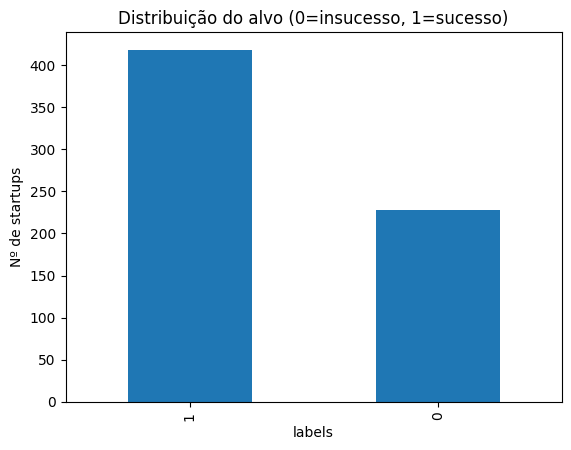

In [15]:
df_train['labels'].value_counts().plot(kind='bar')
plt.title("Distribuição do alvo (0=insucesso, 1=sucesso)")
plt.xlabel("labels")
plt.ylabel("Nº de startups")
plt.show()

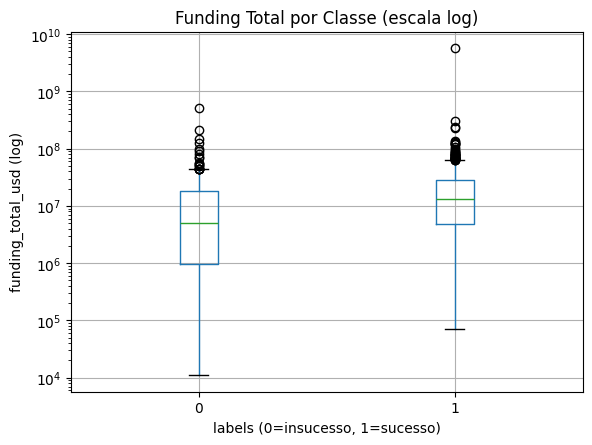

In [16]:
df_train.boxplot(column='funding_total_usd', by='labels')
plt.yscale('log')
plt.title("Funding Total por Classe (escala log)")
plt.suptitle("")
plt.xlabel("labels (0=insucesso, 1=sucesso)")
plt.ylabel("funding_total_usd (log)")
plt.show()

- *Insights:* Startups bem-sucedidas tendem a ter mais capital captado (mediana maior). Outliers justificam escala log.

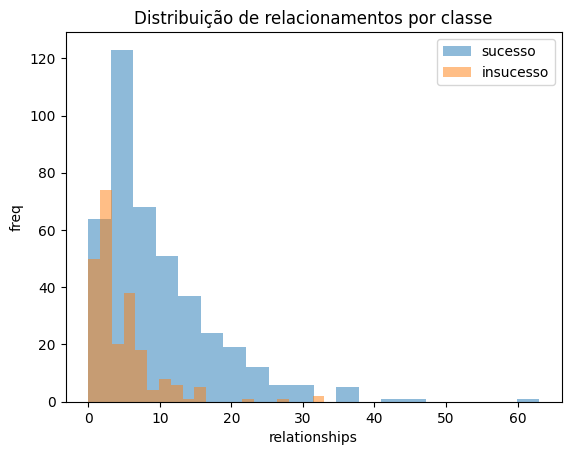

In [17]:
plt.hist(df_train[df_train['labels']==1]['relationships'], bins=20, alpha=0.5, label="sucesso")
plt.hist(df_train[df_train['labels']==0]['relationships'], bins=20, alpha=0.5, label="insucesso")
plt.legend()
plt.title("Distribuição de relacionamentos por classe")
plt.xlabel("relationships")
plt.ylabel("freq")
plt.show()

- *Insights:* startups bem-sucedidas concentram-se em maior número de relacionamentos, sugerindo que networking importa.

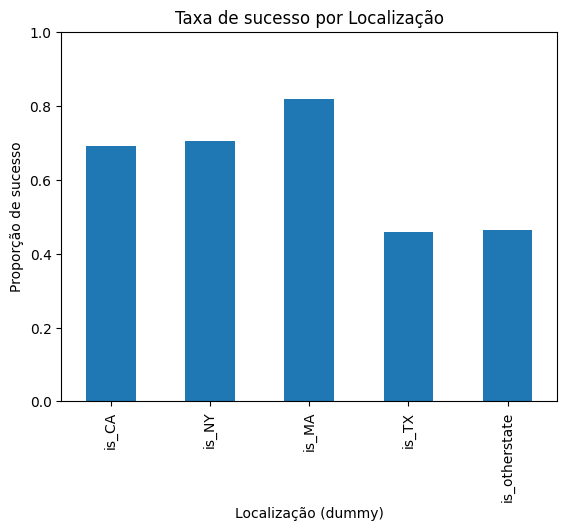

In [18]:
loc_cols = ['is_CA','is_NY','is_MA','is_TX','is_otherstate']

taxa_loc = df_train.groupby(loc_cols)['labels'].mean()

taxas = {}
for col in loc_cols:
    taxas[col] = df_train.groupby(col)['labels'].mean()[1]

taxas_df = pd.Series(taxas)
taxas_df.plot(kind='bar')

plt.title("Taxa de sucesso por Localização")
plt.xlabel("Localização (dummy)")
plt.ylabel("Proporção de sucesso")
plt.ylim(0,1)
plt.show()


- *Insight:* Startups da localizadas em centros cidades grandes apresentam proporção de sucesso ligeiramente maior.

### **Formulação de Hipóteses**

**1. Captação de recursos:** Startups com maior funding total e mais rodadas têm mais chance de sucesso, pois capital acelera crescimento.

**2. Conexões estratégicas:** Startups com mais relacionamentos e milestones tendem a ter maior sucesso, refletindo networking e validação do mercado.

**3. Ecossistema de inovação:** Startups sediadas em polos (CA, NY, MA)  têm maiores chances, pelo acesso a investidores e hubs tecnológicos.

### **Seleção de Features**

Com base na exploração e hipóteses, as features mais relevantes são:

- **Funding e rodadas:** `funding_total_usd`, `funding_rounds`, `avg_participants`
- **Conexões e milestones:** `relationships`, `milestones`
- **Idades:** `age_first_funding_year`, `age_last_funding_year`,`age_first_milestone_year`, `age_last_milestone_year`
- **Localização:** `is_CA`, `is_NY`, `is_MA`, `is_TX`
- **Setor:** dummies como `is_software`, `is_web`, `is_mobile`, etc
- **Flags de investimento:** `has_VC`, `has_angel`, `has_roundA/B/C/D`

---
## **TRATAMENTO E LIMPEZA**

#### **1. Seleção de Features**
Nesta etapa, definimos o conjunto de variáveis que será usado no modelo.  

In [19]:
features = [
    'funding_total_usd','funding_rounds','avg_participants',
    'relationships','milestones',
    'is_CA','is_NY','is_MA','is_TX',
    'age_first_funding_year','age_last_funding_year',
    'age_first_milestone_year','age_last_milestone_year', 'has_VC','has_angel',
    'has_roundA','has_roundB','has_roundC','has_roundD'
]
features = [c for c in features if c in X.columns]

X = X[features].copy()
X_test = df_test[features].copy()

#### **2. Criação de Features Derivadas**

Nesta etapa, são geradas novas variáveis a partir das já existentes para enriquecer o modelo:

- **funding_per_round**: razão entre o total de funding recebido e o número de rodadas de investimento  
  -> mede o quanto, em média, cada rodada contribuiu para o financiamento da startup.  

- **investor_intensity**: produto entre o número médio de participantes por rodada e o total de rodadas  
  -> captura a intensidade/densidade de investidores envolvidos ao longo das rodadas.

As mesmas features derivadas são criadas tanto para o conjunto de treino (`X`) quanto para o conjunto de teste (`X_test`), garantindo consistência.

In [20]:
X['funding_per_round']  = X['funding_total_usd'] / (X['funding_rounds'] + 1)
X['investor_intensity'] = X['avg_participants'] * X['funding_rounds']

X_test['funding_per_round']  = X_test['funding_total_usd'] / (X_test['funding_rounds'] + 1)
X_test['investor_intensity'] = X_test['avg_participants'] * X_test['funding_rounds']

#### **3. Divisão em Conjuntos de Treino e Validação**

Aqui separamos os dados em dois subconjuntos:  
- **Treino (`X_train`, `y_train`)** → usado para ajustar o modelo.  
- **Validação (`X_val`, `y_val`)** → usado para avaliar o desempenho em dados não vistos.  

Parâmetros usados:
- `test_size=0.1`: 10% dos dados vão para validação.  
- `random_state=42`: garante reprodutibilidade dos resultados.  
- `stratify=y`: preserva a proporção entre classes (sucesso/insucesso) nos dois subconjuntos.

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

#### **4. Tratamento de Valores Faltantes nas Colunas `age_*`**

As colunas que começam com `age_` representam idades relativas a eventos (anos até o funding, milestones, etc.).  
Quando esses valores estão ausentes (`NaN`), significa que o evento **não ocorreu**.  

Por isso, adotamos a convenção de preencher esses campos com **0**, indicando ausência do evento.  
A operação é aplicada de forma consistente nos três conjuntos:  
- `X_train`  
- `X_val`  
- `X_test` 

In [22]:
age_cols = [c for c in X.columns if c.startswith('age_')]
for df in (X_train, X_val, X_test):
    df[age_cols] = df[age_cols].fillna(0)

#### **5. Busca de Hiperparâmetros com RandomizedSearchCV**

Nesta etapa, realizamos a **otimização de hiperparâmetros** do `RandomForestClassifier` usando `RandomizedSearchCV`.  
O processo sorteia combinações aleatórias de parâmetros a partir de um dicionário pré-definido (`param_dist`) e avalia cada uma via validação cruzada (`cv=3`).

**Parâmetros testados:**
- `n_estimators`: número de árvores na floresta.  
- `max_depth`: profundidade máxima de cada árvore.  
- `min_samples_split`: nº mínimo de amostras para dividir um nó.  
- `min_samples_leaf`: nº mínimo de amostras em uma folha.  
- `max_features`: nº de features consideradas em cada divisão.  
- `class_weight`: pesos para balancear classes.  

**Configurações da busca:**
- `n_iter=30`: número de combinações testadas.  
- `scoring='accuracy'`: métrica usada para avaliação.  
- `n_jobs=-1`: usa todos os núcleos da CPU para acelerar o processo.  
- `random_state=42`: garante reprodutibilidade.  

Ao final, são exibidos:
- `best_params_`: combinação de hiperparâmetros que obteve melhor desempenho.  
- `best_score_`: acurácia média da validação cruzada com essa configuração.  

In [23]:
param_dist = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5, 0.7, None],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30, 
    cv=3,       
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Melhores parâmetros:", random_search.best_params_)
print("Melhor score (CV):", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Melhores parâmetros: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 5, 'class_weight': None}
Melhor score (CV): 0.777923187863896


#### **Avaliação do Melhor Modelo na Validação**

Após a busca de hiperparâmetros, recuperamos o **melhor estimador** (`best_estimator_`) encontrado pelo `RandomizedSearchCV`.  
Com ele, fazemos previsões no conjunto de validação (`X_val`) e avaliamos o desempenho:

- **Acurácia de validação**: proporção de acertos sobre o total de exemplos.  
- **Matriz de confusão**: mostra detalhadamente os acertos e erros, separando:  
  - Verdadeiros Negativos (TN)  
  - Falsos Positivos (FP)  
  - Falsos Negativos (FN)  
  - Verdadeiros Positivos (TP)  

Isso permite verificar não só o desempenho geral, mas também se o modelo está enviesado para uma das classes (sucesso ou insucesso).  


In [24]:
best_rf = random_search.best_estimator_
pred_val = best_rf.predict(X_val)

print("Acurácia validação:", accuracy_score(y_val, pred_val))
print("Matriz de confusão:\n", confusion_matrix(y_val, pred_val))

Acurácia validação: 0.8
Matriz de confusão:
 [[15  8]
 [ 5 37]]


---
## **TREINAMENTO DO MODELO RANDOM FOREST**

#### **1. Justificativa para Escolha do Modelo Random Forest**

O Random Forest Classifier foi escolhido como modelo principal pois:

1. **Robustez a Outliers e Dados Ruidosos**  
   O Random Forest combina múltiplas árvores de decisão, reduzindo a sensibilidade a valores extremos e dados inconsistentes, comuns em bases reais como a de startups.

2. **Capacidade de Capturar Relações Não Lineares**  
   O Random Forest consegue identificar interações complexas entre variáveis, o que é essencial em cenários de múltiplos fatores de sucesso.

3. **Interpretação via Importância das Features**  
   Além de boa performance, o Random Forest fornece métricas de importância das variáveis, permitindo analisar quais fatores mais influenciam o sucesso de uma startup.

4. **Bom Desempenho em Conjuntos de Dados de Tamanho Moderado**  
   Como nosso dataset não é extremamente grande (~900 linhas), o Random Forest é eficiente em termos de tempo de treino e ainda entrega acurácias competitivas.

Dessa forma, o Random Forest equilibra simplicidade, interpretabilidade e desempenho, sendo uma escolha adequada para este desafio.


#### **2. Treinamento Final e Geração da Submissão**

- O modelo `best_rf` (Random Forest com hiperparâmetros otimizados via RandomizedSearchCV) é treinado novamente utilizando **todo o conjunto de dados de treino** (união de `X_train` e `X_val`)
- Em seguida, o modelo gera as previsões para o **conjunto de teste** (`X_test`).  
- Os resultados são armazenados em um **DataFrame de submissão**, que contém as colunas:
  - `id`: identificador das observações do conjunto de teste.  
  - `labels`: rótulos previstos pelo modelo.  
- Finalmente, o arquivo **`submission_Rf.csv`** é salvo, pronto para ser enviado ao Kaggle.


In [25]:
best_rf.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))
test_pred = best_rf.predict(X_test)

submission = pd.DataFrame({
    "id": df_test["id"],
    "labels": test_pred
})
submission.to_csv("submission_RF.csv", index=False)
print("Arquivo submission_RF.csv gerado!")

Arquivo submission_RF.csv gerado!
